In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import squarify
from scipy.stats import norm
import plotly.express as px
import plotly.figure_factory as ff

In [2]:
df = pd.read_csv('segmentation.csv')

In [3]:
df

class  REGION-CENTROID-COL  REGION-CENTROID-ROW  REGION-PIXEL-COUNT  \
0    BRICKFACE                140.0                125.0                   9   
1    BRICKFACE                188.0                133.0                   9   
2    BRICKFACE                105.0                139.0                   9   
3    BRICKFACE                 34.0                137.0                   9   
4    BRICKFACE                 39.0                111.0                   9   
..         ...                  ...                  ...                 ...   
205      GRASS                 36.0                243.0                   9   
206      GRASS                186.0                218.0                   9   
207      GRASS                197.0                236.0                   9   
208      GRASS                208.0                240.0                   9   
209      GRASS                223.0                185.0                   9   

     SHORT-LINE-DENSITY-5  SHORT-LINE-DENSITY-2  VEDGE-MEAN  VEDGE-SD  \
0                0.000000                   0.0    0.277778  0.062963   
1                0.000000                   0.0    0.333333  0.266667   
2                0.000000                   0.0    0.277778  0.107407   
3                0.000000                   0.0    0.500000  0.166667   
4                0.000000                   0.0    0.722222  0.374074   
..                    ...                   ...         ...       ...   
205              0.111111                   0.0    1.888889  1.851851   
206              0.000000                   0.0    1.166667  0.744444   
207              0.000000                   0.0    2.444444  6.829628   
208              0.111111                   0.0    1.055556  0.862963   
209              0.000000                   0.0    0.500000  0.349603   

     HEDGE-MEAN  HEDGE-SD  INTENSITY-MEAN  RAWRED-MEAN  RAWBLUE-MEAN  \
0      0.666667  0.311111        6.185185     7.333334      7.666666   
1      0.500000  0.077778        6.666666     8.333334      7.777778   
2      0.833333  0.522222        6.111111     7.555555      7.222222   
3      1.111111  0.474074        5.851852     7.777778      6.444445   
4      0.888889  0.429629        6.037037     7.000000      7.666666   
..          ...       ...             ...          ...           ...   
205    2.000000  0.711110       13.333333     9.888889     12.111111   
206    1.166667  0.655555       13.703704    10.666667     12.666667   
207    3.333333  7.599998       16.074074    13.111111     16.666668   
208    2.444444  5.007407       14.148149    10.888889     13.000000   
209    2.388889  2.080776       12.962963    11.555555      9.777778   

     RAWGREEN-MEAN  EXRED-MEAN  EXBLUE-MEAN  EXGREEN-MEAN  VALUE-MEAN  \
0         3.555556    3.444444     4.444445     -7.888889    7.777778   
1         3.888889    5.000000     3.333333     -8.333333    8.444445   
2         3.555556    4.333334     3.333333     -7.666666    7.555555   
3         3.333333    5.777778     1.777778     -7.555555    7.777778   
4         3.444444    2.888889     4.888889     -7.777778    7.888889   
..             ...         ...          ...           ...         ...   
205      18.000000  -10.333333    -3.666667     14.000000   18.000000   
206      17.777779   -9.111111    -3.111111     12.222222   17.777779   
207      18.444445   -8.888889     1.777778      7.111111   18.555555   
208      18.555555   -9.777778    -3.444444     13.222222   18.555555   
209      17.555555   -4.222222    -9.555555     13.777778   17.555555   

     SATURATION-MEAN  HUE-MEAN  
0           0.545635 -1.121818  
1           0.538580 -0.924817  
2           0.532628 -0.965946  
3           0.573633 -0.744272  
4           0.562919 -1.175773  
..               ...       ...  
205         0.452229  2.368310  
206         0.401347  2.382683  
207         0.292729  2.789800  
208         0.421621  2.392487  
209         0.445418  1.838850  

[210 rows x 20 columns]

In [4]:
df.describe()

REGION-CENTROID-COL  REGION-CENTROID-ROW  REGION-PIXEL-COUNT  \
count           210.000000           210.000000               210.0   
mean            124.647619           122.757143                 9.0   
std              74.104024            58.139686                 0.0   
min               1.000000            11.000000                 9.0   
25%              60.500000            81.500000                 9.0   
50%             123.500000           121.500000                 9.0   
75%             189.750000           174.500000                 9.0   
max             252.000000           250.000000                 9.0   

       SHORT-LINE-DENSITY-5  SHORT-LINE-DENSITY-2  VEDGE-MEAN    VEDGE-SD  \
count            210.000000            210.000000  210.000000  210.000000   
mean               0.008466              0.006349    1.925132    5.719529   
std                0.029549              0.030077    3.158211   43.495942   
min                0.000000              0.000000    0.000000    0.000000   
25%                0.000000              0.000000    0.666667    0.400921   
50%                0.000000              0.000000    1.222222    0.828695   
75%                0.000000              0.000000    1.888890    1.676634   
max                0.111111              0.222222   25.500000  572.996400   

       HEDGE-MEAN     HEDGE-SD  INTENSITY-MEAN  RAWRED-MEAN  RAWBLUE-MEAN  \
count  210.000000   210.000000      210.000000   210.000000    210.000000   
mean     2.604233    11.638377       37.091005    32.967725     44.011112   
std      4.798268    97.390023       38.677168    35.540563     43.804447   
min      0.000000     0.000000        0.000000     0.000000      0.000000   
25%      0.777779     0.410816        6.453704     7.000000      8.277778   
50%      1.388889     0.913176       21.314816    18.611112     26.833334   
75%      2.597221     1.980485       52.629629    46.750000     64.194447   
max     44.722225  1386.329200      143.444440   136.888890    150.888890   

       RAWGREEN-MEAN  EXRED-MEAN  EXBLUE-MEAN  EXGREEN-MEAN  VALUE-MEAN  \
count     210.000000  210.000000   210.000000    210.000000  210.000000   
mean       34.294180  -12.369841    20.760317     -8.390476   44.888360   
std        37.057003   11.559599    18.761842     11.003746   43.235182   
min         0.000000  -48.222220    -9.666667    -30.555555    0.000000   
25%         3.805555  -18.111110     4.111111    -15.750000   10.527778   
50%        20.000000  -10.333333    19.555556     -9.888889   28.388890   
75%        46.472223   -4.666666    34.333332     -3.722222   64.194447   
max       142.555560    5.777778    78.777780     21.888890  150.888890   

       SATURATION-MEAN    HUE-MEAN  
count       210.000000  210.000000  
mean          0.423230   -1.340397  
std           0.227333    1.559405  
min           0.000000   -2.530950  
25%           0.275722   -2.187112  
50%           0.365455   -2.044163  
75%           0.539738   -1.429800  
max           1.000000    2.864931

In [5]:
df['class'].value_counts()

BRICKFACE    30
CEMENT       30
FOLIAGE      30
WINDOW       30
GRASS        30
SKY          30
PATH         30
Name: class, dtype: int64

In [6]:
df['REGION-PIXEL-COUNT'].unique

<bound method Series.unique of 0      9
1      9
2      9
3      9
4      9
      ..
205    9
206    9
207    9
208    9
209    9
Name: REGION-PIXEL-COUNT, Length: 210, dtype: int64>

In [7]:
df = df.drop('REGION-PIXEL-COUNT', axis = 1)

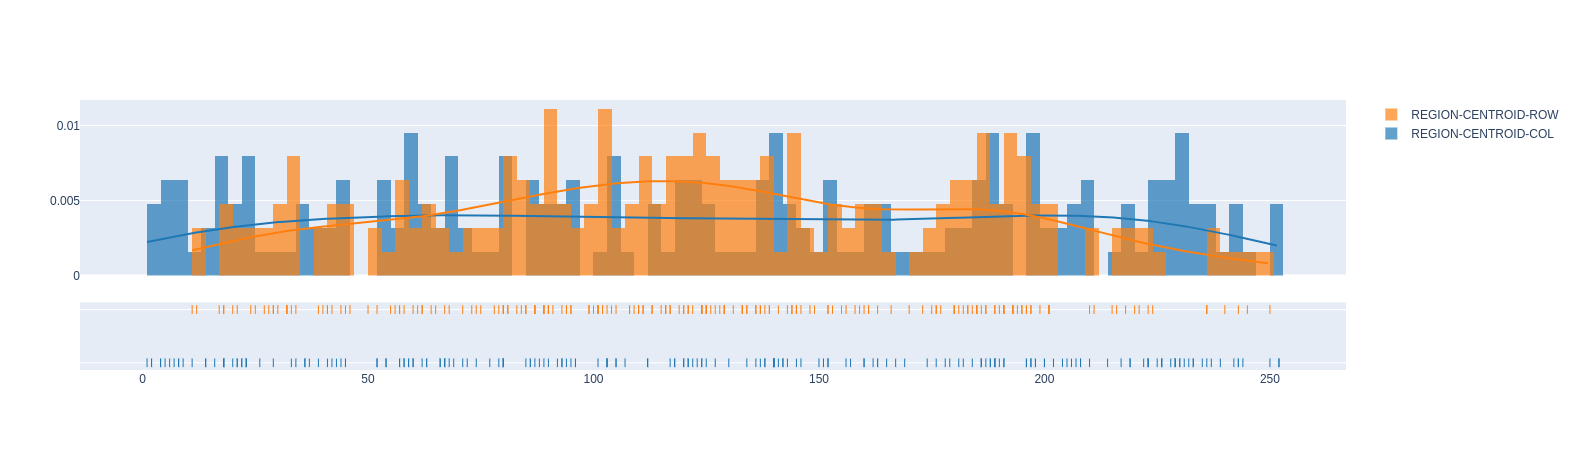

In [8]:
group_labels = ['REGION-CENTROID-COL','REGION-CENTROID-ROW']


# Histogram chart for Re


att1 = df['REGION-CENTROID-COL']
att2 = df['REGION-CENTROID-ROW']

fig = ff.create_distplot([att1, att2], group_labels, bin_size=3)
fig.show()

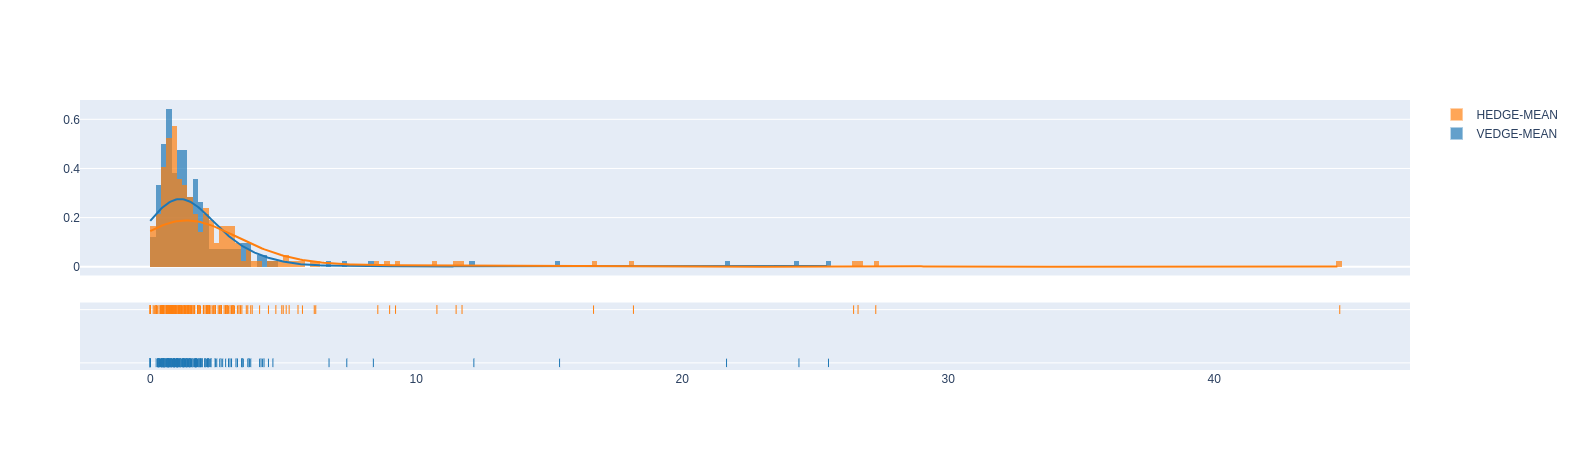

In [9]:
group_labels = ['VEDGE-MEAN','HEDGE-MEAN']


# Histogram chart for Re


att1 = df['VEDGE-MEAN']
att2 = df['HEDGE-MEAN']

fig = ff.create_distplot([att1, att2], group_labels, bin_size=0.2)
fig.show()

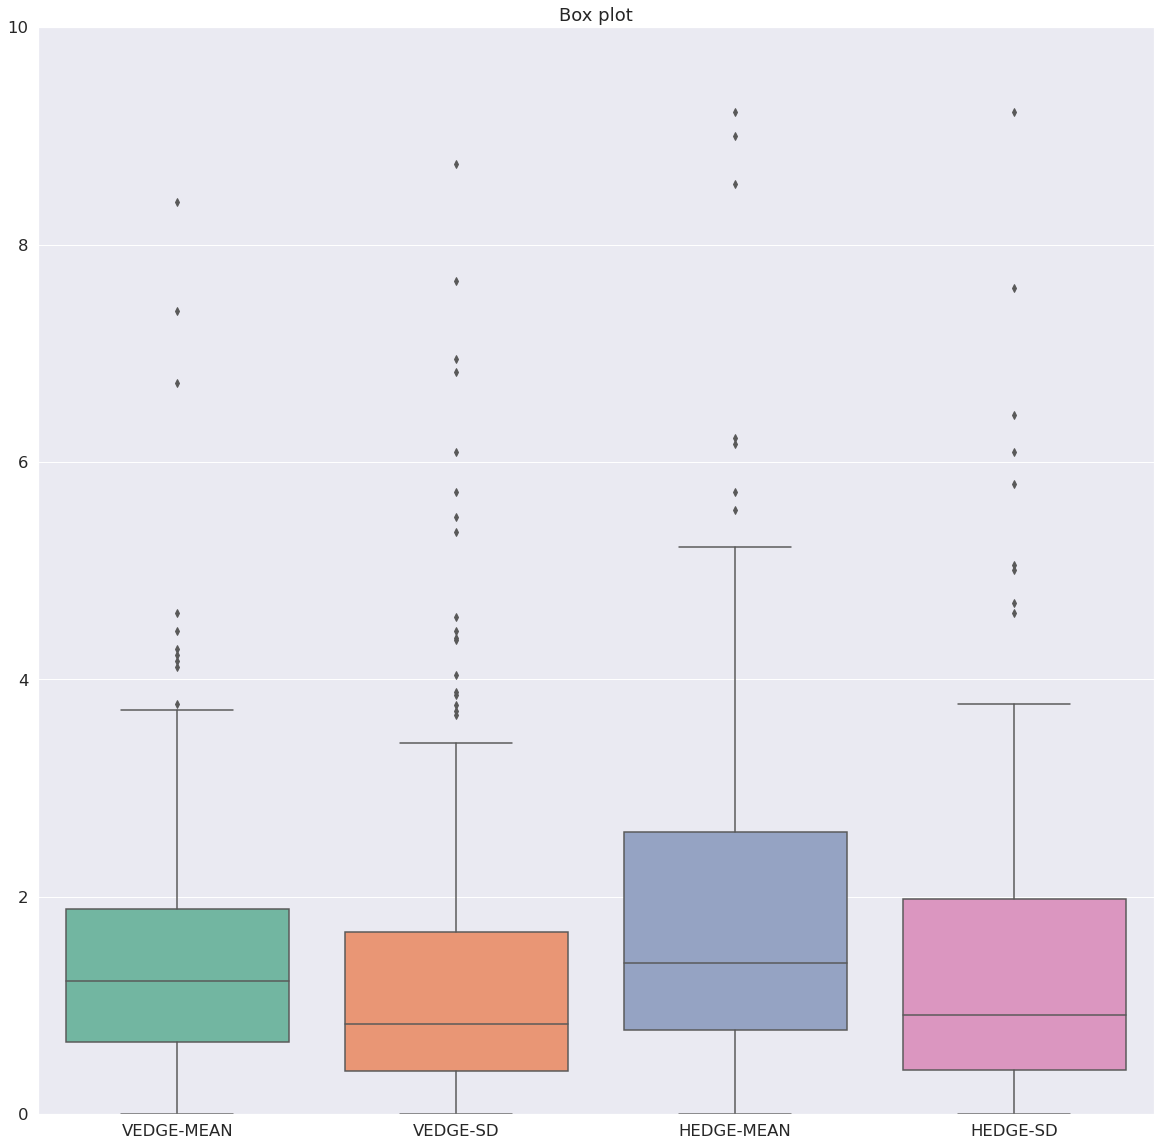

In [10]:
sns.set(font_scale=1.5, rc={'figure.figsize':(20, 20)})

ax = sns.boxplot(
    data=df[
        [
            'VEDGE-MEAN',
            'VEDGE-SD',
            'HEDGE-MEAN',
            'HEDGE-SD',
            'class'
        ]
    ], 
    orient="v", 
    palette="Set2")
ax.set_ylim(0,10.0)

ax = ax.set_title('Box plot')

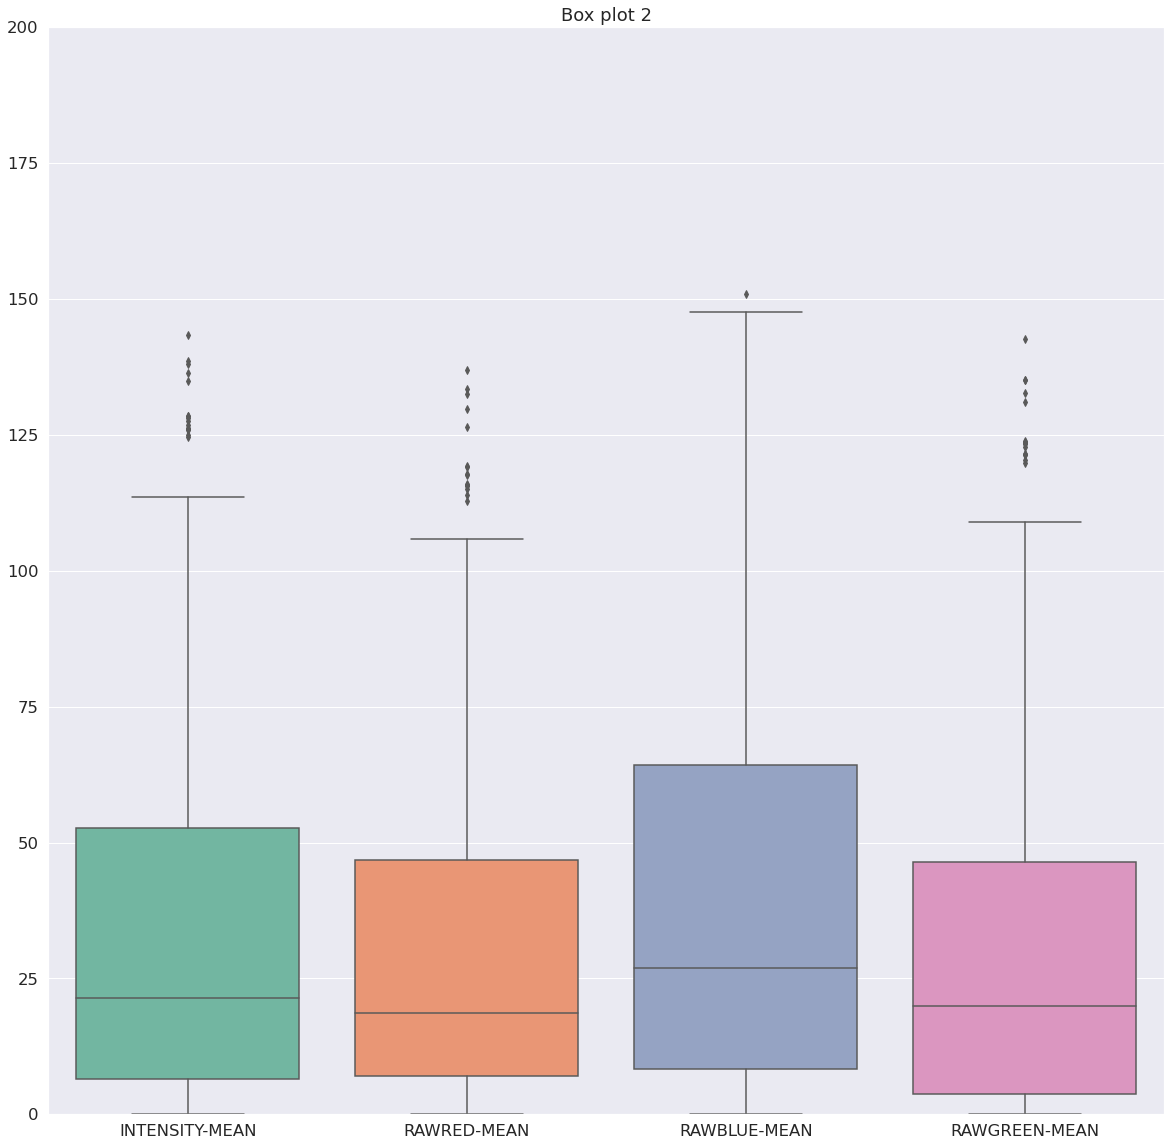

In [11]:
sns.set(font_scale=1.5, rc={'figure.figsize':(20, 20)})

ax = sns.boxplot(
    data=df[
        [
            'INTENSITY-MEAN',
            'RAWRED-MEAN',
            'RAWBLUE-MEAN',
            'RAWGREEN-MEAN',
            'class'
        ]
    ], 
    orient="v", 
    palette="Set2")
ax.set_ylim(0,200.0)

ax = ax.set_title('Box plot 2')

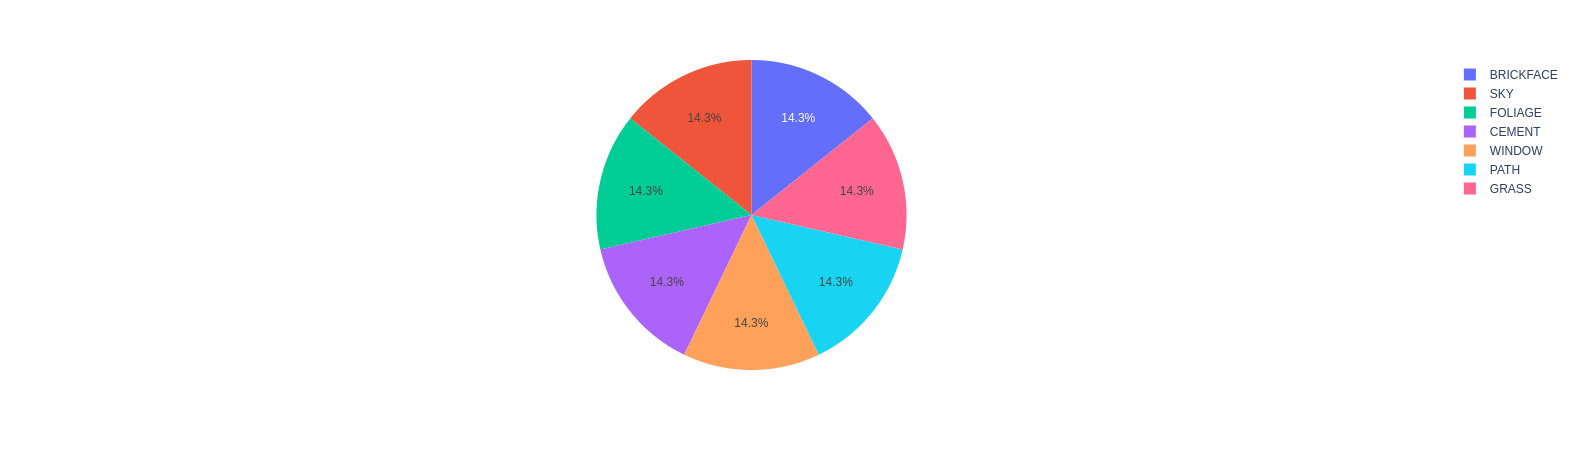

In [12]:
df1 = pd.DataFrame({'Counts': df['class'].value_counts(),'Classes': df['class'].unique()})

fig = px.pie(df1, values='Counts' , names='Classes')
fig.show()

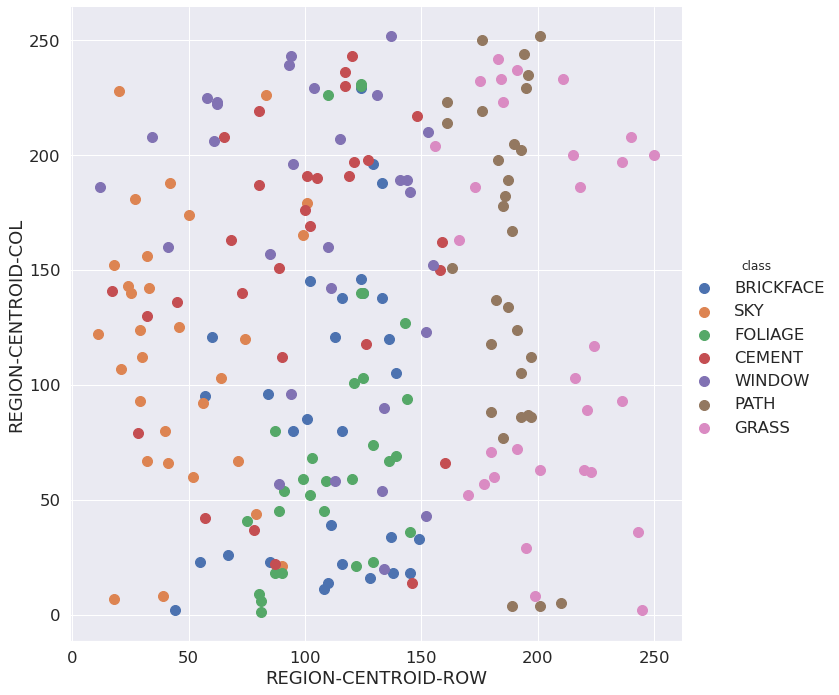

In [13]:
sns.set(font_scale=1.5) 

axs = sns.FacetGrid(df, hue="class", height=10).map(plt.scatter, "REGION-CENTROID-ROW", "REGION-CENTROID-COL", s=100).add_legend()

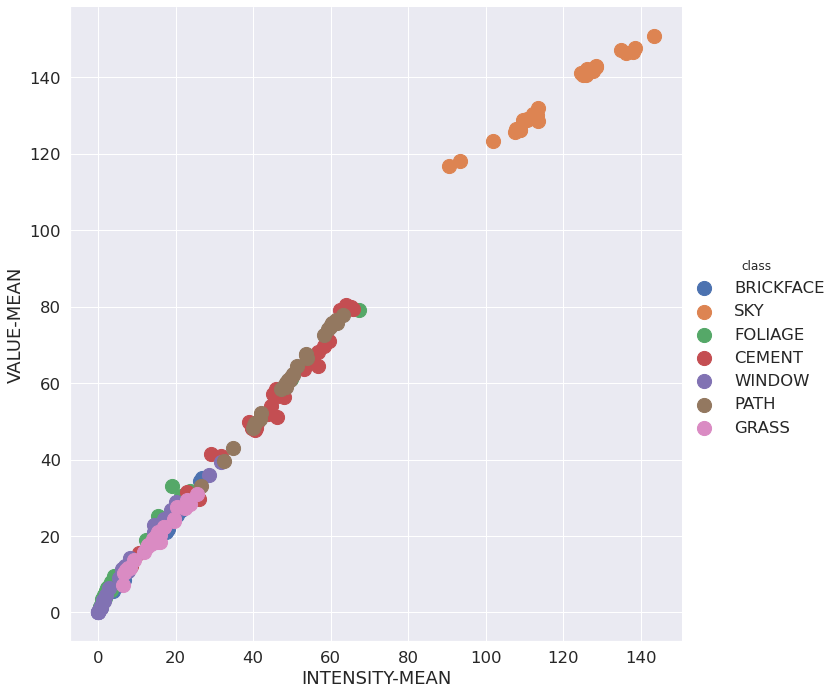

In [14]:
sns.set(font_scale=1.5) 

axs = sns.FacetGrid(df, hue="class", height=10).map(plt.scatter, "INTENSITY-MEAN", "VALUE-MEAN", s=200).add_legend()

# VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD

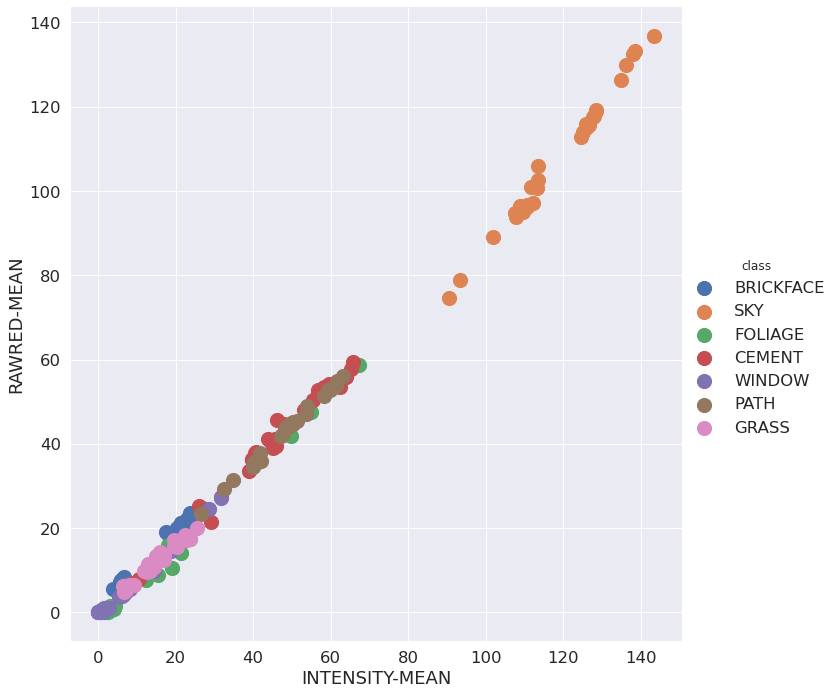

In [15]:
sns.set(font_scale=1.5) 

axs = sns.FacetGrid(df, hue="class", height=10).map(plt.scatter, "INTENSITY-MEAN", "RAWRED-MEAN", s=200).add_legend()

# RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN

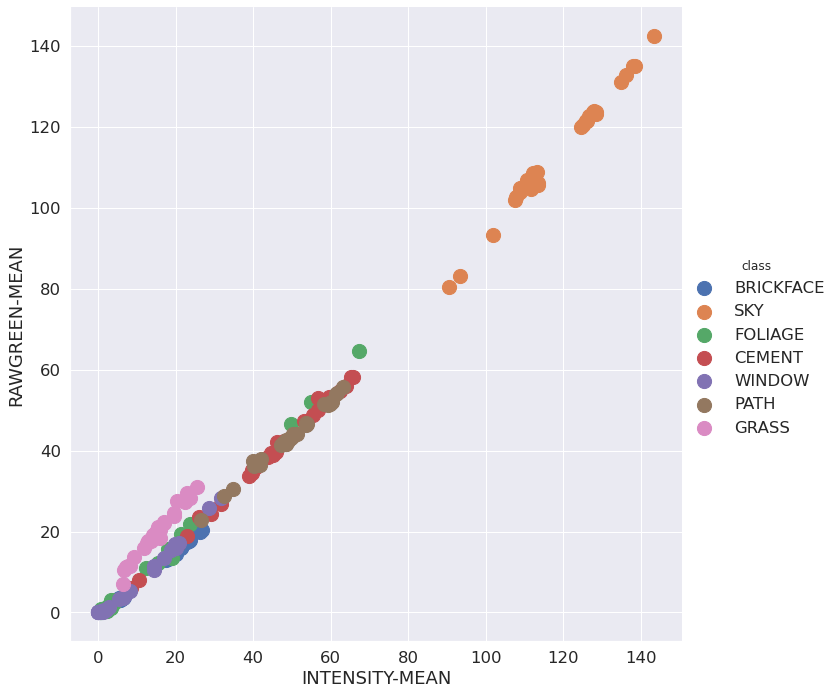

In [16]:
sns.set(font_scale=1.5) 

axs = sns.FacetGrid(df, hue="class", height=10).map(plt.scatter, "INTENSITY-MEAN", "RAWGREEN-MEAN", s=200).add_legend()

# RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN

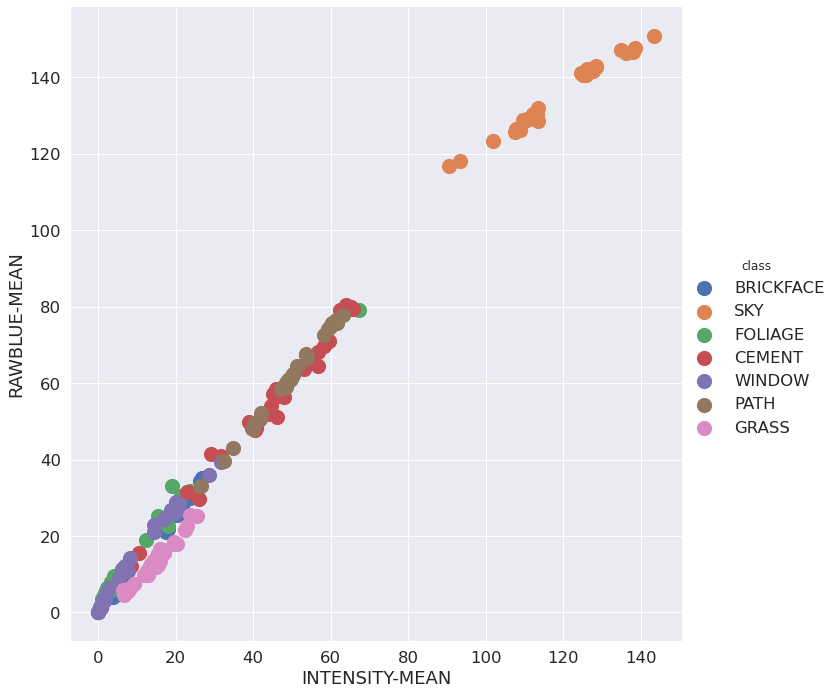

In [17]:
sns.set(font_scale=1.5) 

axs = sns.FacetGrid(df, hue="class", height=10).map(plt.scatter, "INTENSITY-MEAN", "RAWBLUE-MEAN", s=200).add_legend()

# RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN

<Figure size 1440x1440 with 0 Axes>

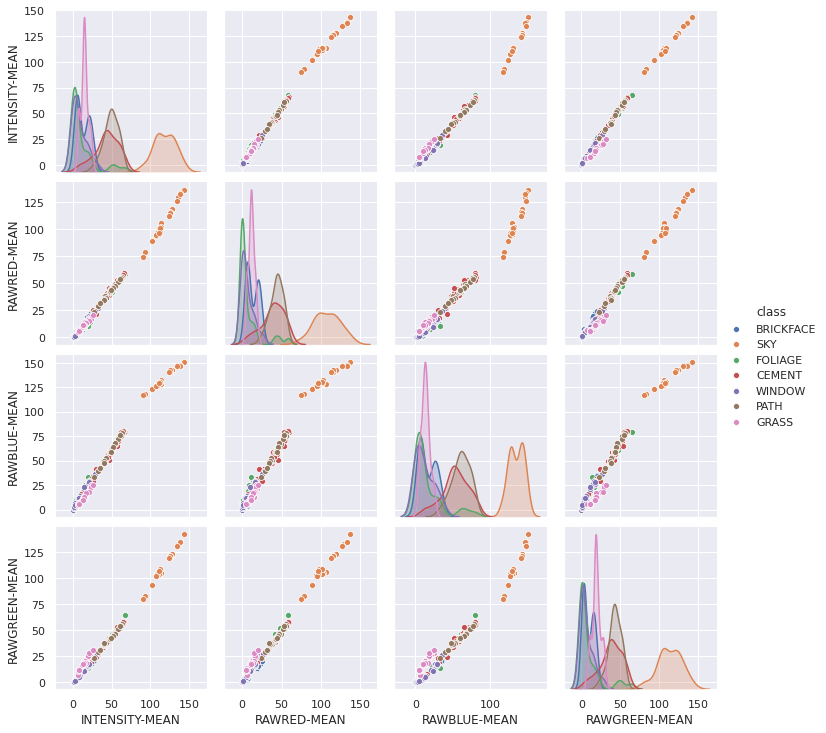

In [18]:
sns.set(font_scale=1.0) 
plt.figure(figsize=(20, 20))

axs = sns.pairplot(df[['INTENSITY-MEAN','RAWRED-MEAN','RAWBLUE-MEAN','RAWGREEN-MEAN', 'class']], hue="class")

<Figure size 2160x2160 with 0 Axes>

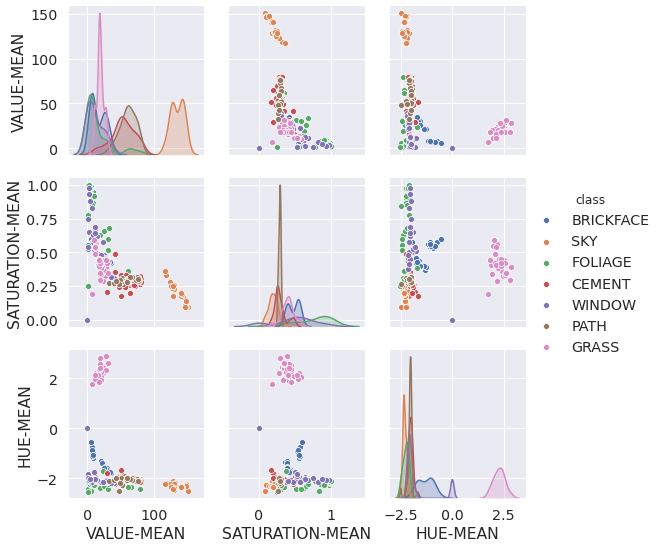

In [19]:
sns.set(font_scale=1.3) 
plt.figure(figsize=(30, 30))

axs = sns.pairplot(df[['VALUE-MEAN','SATURATION-MEAN','HUE-MEAN','class']], hue="class")

<Figure size 2160x2160 with 0 Axes>

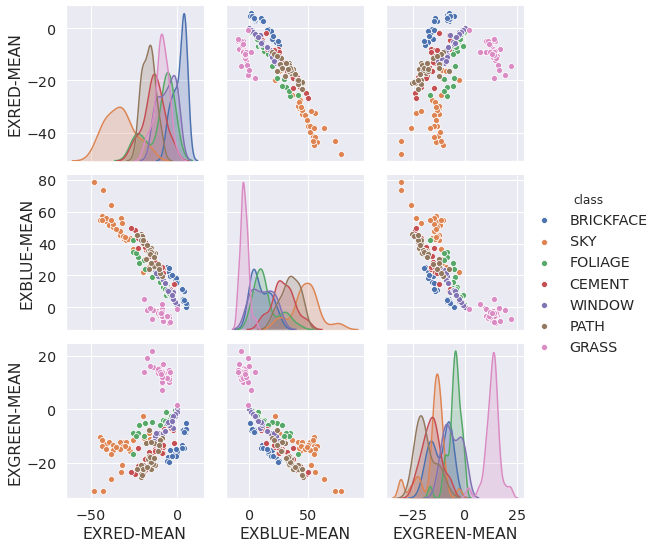

In [20]:
sns.set(font_scale=1.3) 
plt.figure(figsize=(30, 30))

axs = sns.pairplot(df[['EXRED-MEAN','EXBLUE-MEAN','EXGREEN-MEAN','class']], hue="class")

In [21]:
df["Class_Id"] = df["class"].astype('category').cat.codes

print(df[['Class_Id','class']]['class'].unique())
print(df[['Class_Id','class']]['Class_Id'].unique())

['BRICKFACE' 'SKY' 'FOLIAGE' 'CEMENT' 'WINDOW' 'PATH' 'GRASS']
[0 5 2 1 6 4 3]


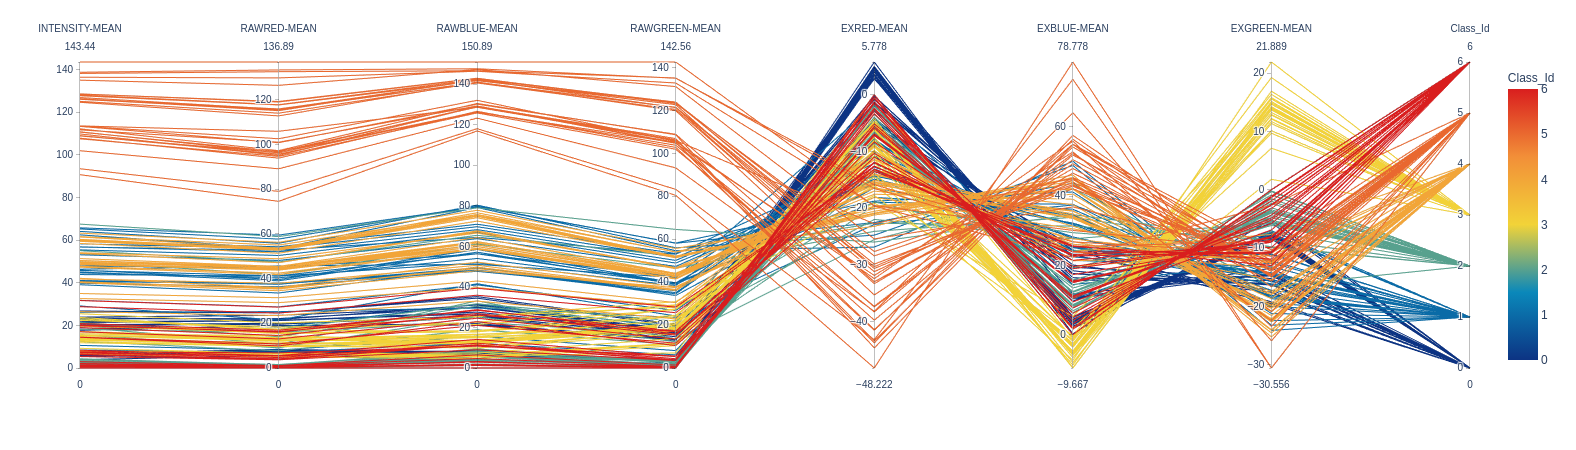

In [32]:
fig = px.parallel_coordinates(
    df,
    color = "Class_Id",
    dimensions=
    [
        'INTENSITY-MEAN',
        'RAWRED-MEAN',
        'RAWBLUE-MEAN',
        'RAWGREEN-MEAN',
        'EXRED-MEAN',
        'EXBLUE-MEAN',
        'EXGREEN-MEAN',
        'Class_Id'
    ],
    color_continuous_scale = px.colors.diverging.Portland,
    color_continuous_midpoint = 3
)
fig.show()

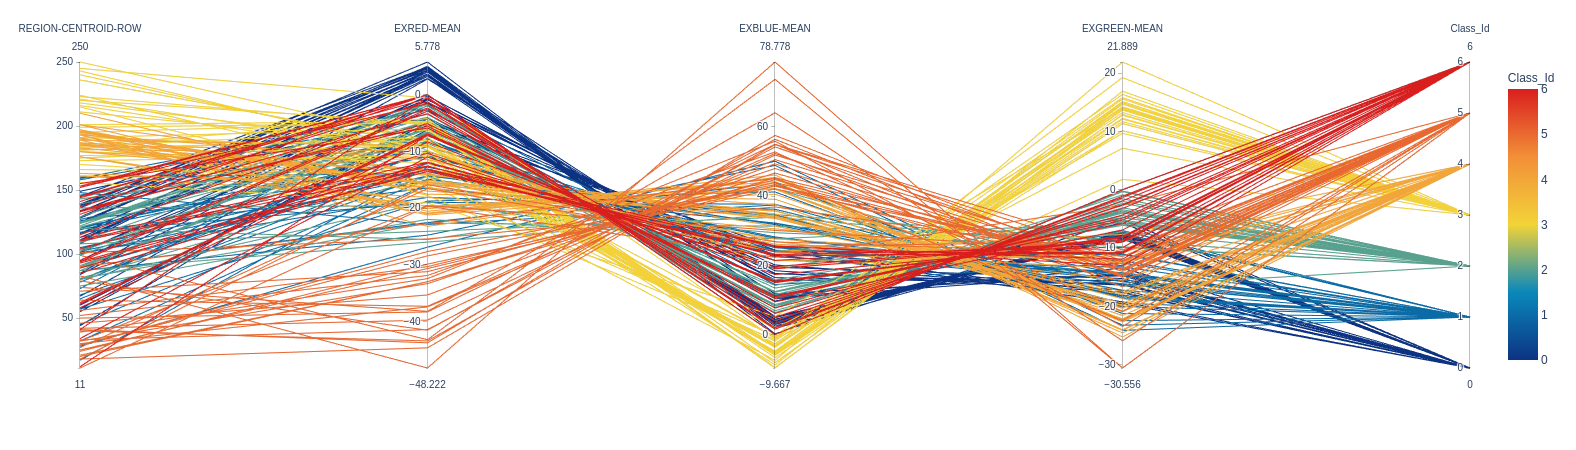

In [30]:
fig = px.parallel_coordinates(
    df,
    color = "Class_Id",
    dimensions=
    [
        'REGION-CENTROID-ROW',
        'EXRED-MEAN',
        'EXBLUE-MEAN',
        'EXGREEN-MEAN',
#         'VALUE-MEAN',
#         'SATURATION-MEAN',
#         'HUE-MEAN',
        'Class_Id'
    ],
    color_continuous_scale = px.colors.diverging.Portland,
    color_continuous_midpoint = 3
)
fig.show()